# Python Course - Networks and Knowledge Graphs

Katarzyna Nurzynska, Sebastian Nilsson, BIKG

## <font color='green'>Overview</font>

**We will go through:**

* Backround on networks and graphs
* Part 1: 
    * Building simple networks with NetworkX
    * Introduction to network analysis using degree metric 
    * Network visualisation with Pyvis 
    * <font color='red'>*First use case: drug-drug interactions*</font>
* Part 2: 
    * What is BIKG and how to access it?
    * How to create graph schema?
    * How to visualise your BIKG subgraph 
    * <font color='red'>*Second use case: Trop2*</font>
    
The emphasis of this course will be on data visualisation rather than deep data analysis. 

**What we will not cover:**
* Other metrics than degree, e.g. betweenness centrality (as they are not very relevant for drug-drug interactions dataset)

    
#**Data:**

* Part 1: For the purpose of this course we will use the data file summarising drug-drug interactions
    * DDI_data.csv file is extracted from drug bank v5.1, it includes the following items: Drug1_id, Drug2_id, Drug1_name, Drug2_name, and the interaction types between Drug1 and Drug2.  
    * https://data.mendeley.com/datasets/md5czfsfnd/1/files/4530a4be-8cff-4cfb-a309-9343f92f6832
    * https://data.mendeley.com/
* Part 2: BIKG database 
    * Genes, Compounds and Diseases associated with Trop2 (Trop-2 is a transmembrane glycoprotein that is upregulated in many cancer types: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6402435/)

**Key Python libraries that we will use:**

* Pandas
* NetworkX
* Pyvis
* BIKG

## <font color='green'>Background</font>

**What are networks and graphs?**

A network (or graph) is a colleciton of nodes and edges which allows us to model the relationships between nodes. 
In recent years, network science has seen a recent explosion in popularity thanks to its wide ranging applications.
Some of the Networks' applications include social media or modelling biological systems.

**What is a Knowledge Graph?**

A Knowledge Graph is a set of data points connected by relations that describe a domain, for instance, a business, an organization, or a field of study. It is a powerful way of representing data because Knowledge Graphs can be built automatically and can then be explored to reveal new insights about the domain.

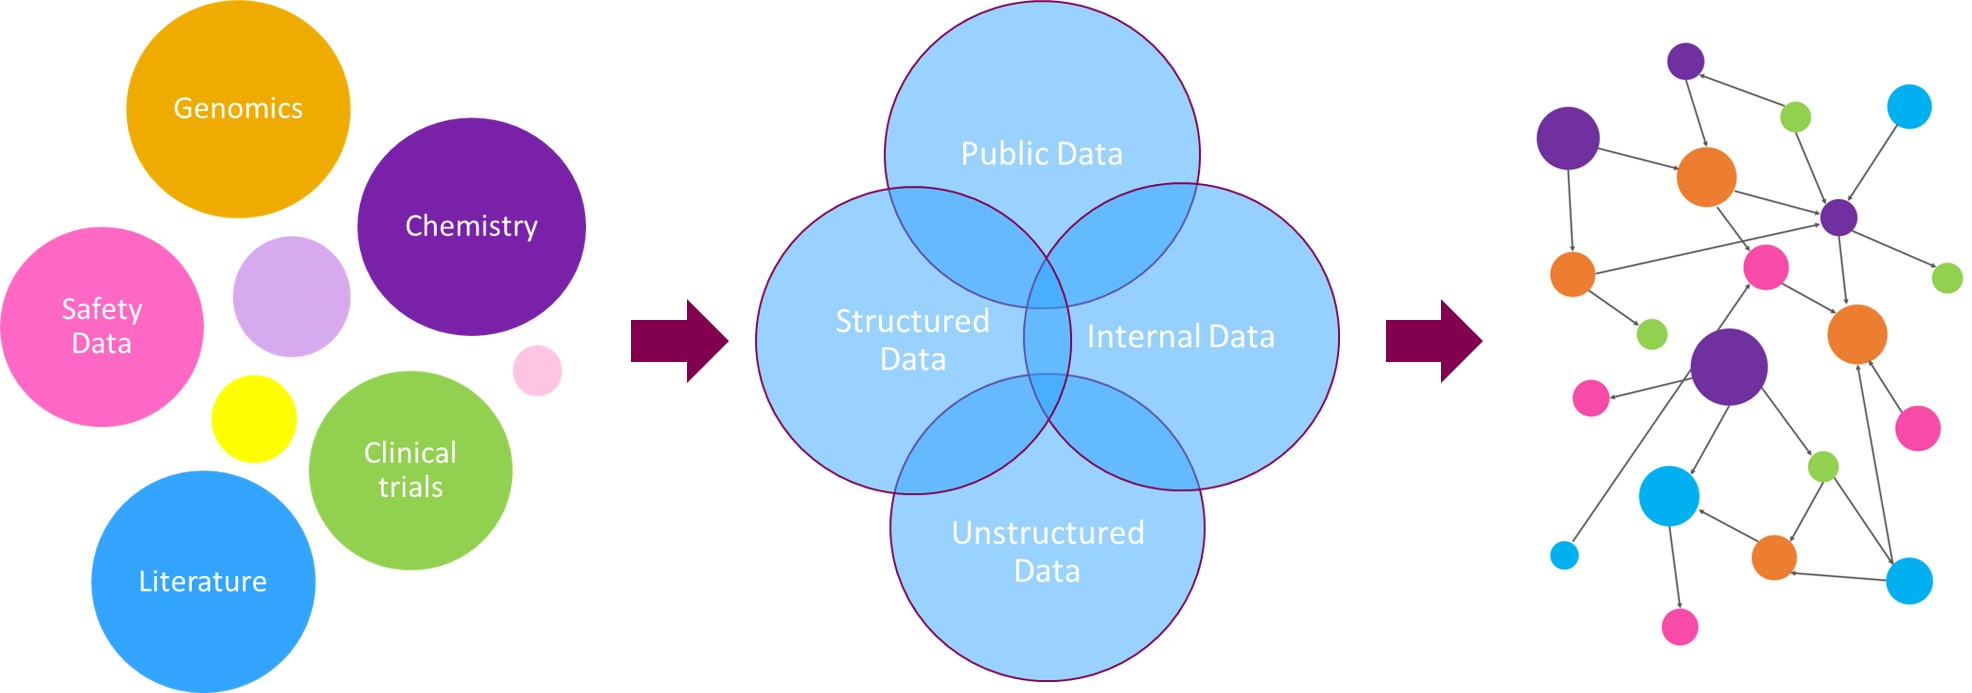

In [1]:
from IPython.display import Image
Image('/home/kvmm591/kvmm591/Python_training/Python_networks/Python_course/KG_pic.jpg')

**Applications of Graphs in Business**

Raw data formats can be challenging for human brains to process. A graph visualisation can help with detecting unexpected connections, hidden patterns and outliers.

Knowledge Graph value for business: 
* Quickly find relevant information 
* Find weak and emerging signals in the data
* Get new insights by combining internal and public data 
* Solve emergent use cases/Create new hypothesis
* Control access and visibility at multiple levels (graph, subgraph)
* Perform cutting-edge analytics


**Biological Insights Knowledge Graph (BIKG)**

Recent years have seen rapid growth in the popularity of knowledge grahs in the life sciences domain. Knowledge graphs often serve as a backbone for data integration within organisation, providing a common representation structure which enables querying across data sources.

BIKG is an AstraZeneca project aimed at building a knowledge graph combining both public and internal data to facilitate knowledge discovery using machine learning. BIKG integrates knowledge from heterogenous data sources including public databases like ChEMBL or Ensembl, information extracted from full-text publications using Natural Language Processing (NLP) techniques as well as diverse proprietary datasets collected as part of AstraZeneca drug development process and biological experimentation. 

To find out more please visit: 
* https://bikg.astrazeneca.net/
* https://browser.bikg.astrazeneca.net/

## <font color='green'>Part 1: Simple Networks</font>

In [2]:
#pip install networkx
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
#Create an empty graph (initialize graph object)
G = nx.Graph()

#Adding nodes
G.add_node('A') #add single node
G.add_nodes_from(['B','C','D','E']) #add multiple nodes

#Adding edges
G.add_edge('A','B')
G.add_edges_from([('A','C'), ('B','D'), ('B','E'), ('C', 'E')])

#Accessing vertex and edge sets
print("Vertex set: ",G.nodes())
print("Edge set: ",G.edges())

Vertex set:  ['A', 'B', 'C', 'D', 'E']
Edge set:  [('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'E')]


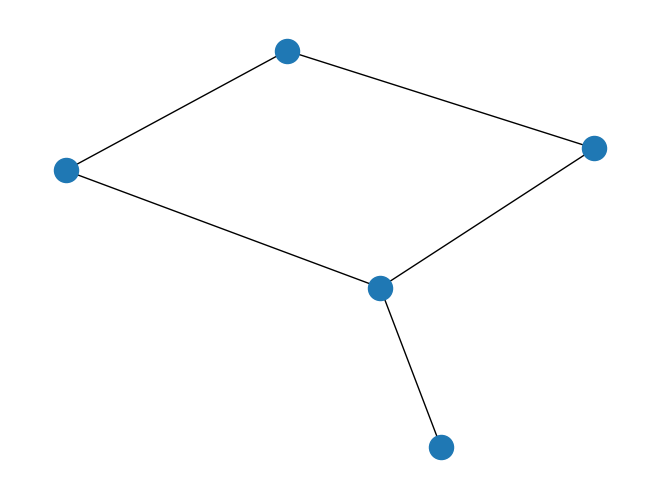

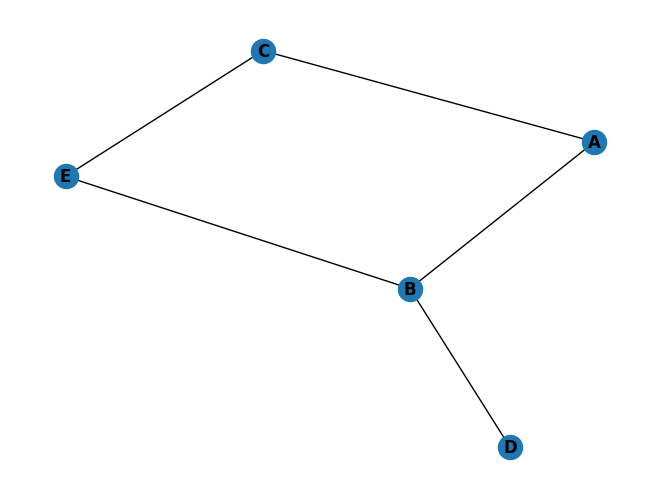

In [4]:
#Drawing graph
nx.draw(G)
plt.show()

#Add vertex labels
nx.draw(G, with_labels=True, font_weight='bold')
plt.show()

By looking at this simple network you can get a good understanding how data are connected. B has the most connections with other nodes (3). A, E and C nodes have only 2 connections and D one connection. 

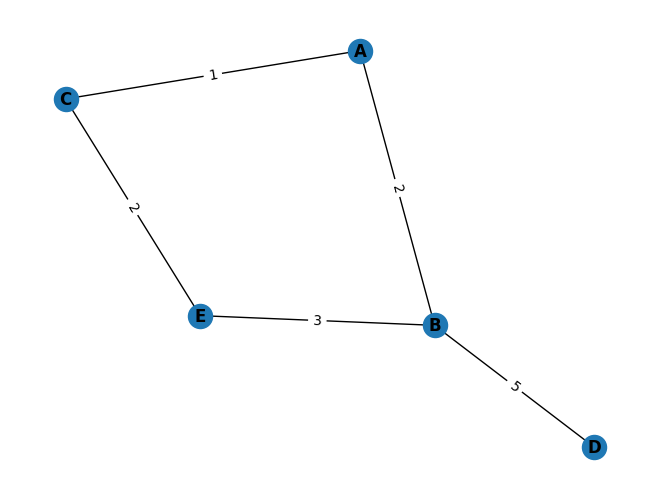

In [5]:
#Creating weighted graph
G = nx.Graph() 
E = [('A', 'B', 2), ('A', 'C', 1), ('B', 'D', 5), ('B', 'E', 3), ('C', 'E', 2)]
G.add_weighted_edges_from(E)

pos=nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
edge_weight = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
plt.show()

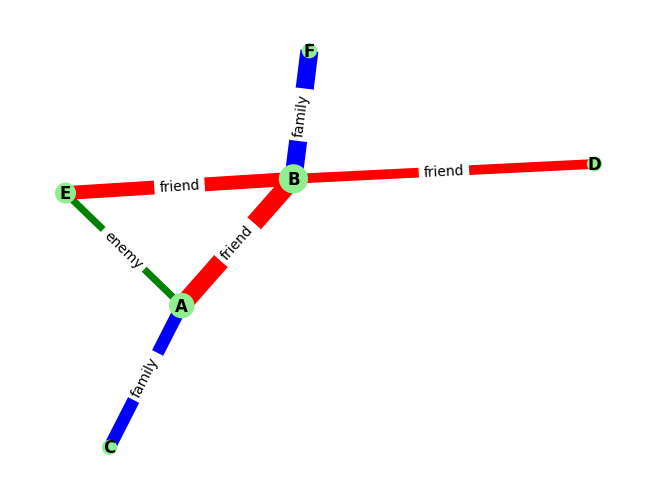

In [6]:
#Creating weighted graph (edges: labels, color, thickness; nodes: size based on degree)
G = nx.Graph() 
G.add_edge('A', 'B', weight=13, color='r', relation='friend')
G.add_edge('A', 'C', weight=9, color='b', relation='family')
G.add_edge('B', 'D', weight=7, color='r', relation='friend')
G.add_edge('E', 'B', weight=10, color='r', relation='friend')
G.add_edge('E', 'A', weight=5, color='g', relation='enemy')
G.add_edge('F', 'B', weight=13, color='b', relation='family')

G.add_node("A")#, size=800)
G.add_node("B")#, size=1000)
G.add_node("C")#, size=200)
G.add_node("D")#, size=200)
G.add_node("E")#, size=500)
G.add_node("F")#, size=200)

colors = nx.get_edge_attributes(G,'color').values()
weights = nx.get_edge_attributes(G,'weight').values()

#Size of the node should correspond to its degree
d = dict(G.degree)

pos=nx.spring_layout(G)
nx.draw(G, pos,
        edge_color=colors,
        width=list(weights),
        with_labels=True, 
        font_weight='bold',
        node_color="lightgreen",
        node_size=[v * 100 for v in d.values()]  # Scaling the size of the nodes by 100*degree
       )

edge_weight = nx.get_edge_attributes(G,'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)

plt.show()

### <font color='red'> First use case: drug-drug interactions </font>

In [7]:
import pandas as pd
import numpy as np

from pyvis.network import Network
import networkx as nx
import matplotlib.pyplot as plt

from collections import Counter #Counter tool - you can count the key-value pairs in an object 
from  itertools import combinations #Intertools - to create iterations for efficient looping; combinations - all the combinations of list  

**1) Data overview**

* Every pairwise drug interaction is a relationship between two nodes (i.e. the two drug compounds).There are 222696 raws and 5 columns. 

In [8]:
#Import and view dataset
DDI_data = pd.read_csv('/home/kvmm591/kvmm591/Python_training/Python_networks/Data/DDI_data.csv')
DDI_data.head(5)

,drug1_id,drug2_id,drug1_name,drug2_name,interaction_type
0,DB00006,DB00346,Bivalirudin,Alfuzosin,serum concentration
1,DB00006,DB13783,Bivalirudin,Acemetacin,risk or severity of bleeding
2,DB00006,DB06605,Bivalirudin,Apixaban,anticoagulant activities
3,DB00006,DB06695,Bivalirudin,Dabigatran etexilate,anticoagulant activities
4,DB00006,DB09075,Bivalirudin,Edoxaban,anticoagulant activities


In [9]:
DDI_data.shape

(222696, 5)

**2) List types of interactions**

In [10]:
#List types of interactions (top 20)
DDI_data['interaction_type'].value_counts()[:20]

risk or severity of adverse effects                              62767
metabolism                                                       42811
serum concentration                                              39294
therapeutic efficacy                                             12807
hypotensive activities                                           10051
QTc-prolonging activities                                         5837
antihypertensive activities                                       5638
central nervous system depressant (CNS depressant) activities     5279
anticoagulant activities                                          4344
vasoconstricting activities                                       2577
hypoglycemic activities                                           2461
risk or severity of hypotension                                   1840
sedative activities                                               1740
hypokalemic activities                                            1561
absorp

**3) List drugs with the most interactions**

In [11]:
#List drugs with the most interactions
drugs = DDI_data['drug1_name'].append(DDI_data['drug2_name']).value_counts()
drugs[:20] 

/scratch/kvmm591/ipykernel_259375/822163673.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  drugs = DDI_data['drug1_name'].append(DDI_data['drug2_name']).value_counts()


Amiodarone       1035
Nefazodone        990
Phenobarbital     984
Venlafaxine       970
Primidone         955
Phenytoin         942
Fluvoxamine       934
Carbamazepine     933
Curcumin          928
Fosphenytoin      923
Ziprasidone       922
Pentobarbital     907
Verapamil         882
Clozapine         858
Diltiazem         851
Cyclosporine      844
Vemurafenib       842
Rifampicin        820
Pitolisant        815
Stiripentol       813
dtype: int64

**4) Types of interactions for each pair of drugs**

In [12]:
#Print pairs of drugs that interact with each other and quantity of interactions (qty is either 1 or 2 in our case)
n = 10
df_poly_se_sm = DDI_data[['drug1_name', 'drug2_name']]
L = Counter([y for x in df_poly_se_sm.values for y in combinations(x, 2)]).most_common(n) #Most_common: Return a list of the n most common elements and their counts from the most common to the least.

combi_df = pd.DataFrame(L, columns=['Pair', 'Qty'])
combi_df

,Pair,Qty
0,"(Cyclosporine, Vincristine)",2
1,"(Cyclosporine, Ledipasvir)",2
2,"(Cyclosporine, Doxorubicin)",2
3,"(Cholecalciferol, Doxorubicin)",2
4,"(Pravastatin, Vincristine)",2
5,"(Fluvoxamine, Doxorubicin)",2
6,"(Amphetamine, Bupropion)",2
7,"(Nicotine, Tegafur)",2
8,"(Bortezomib, Doxorubicin)",2
9,"(Betaxolol, Doxorubicin)",2


In [13]:
#What number 2 means -> E.g. There are two types of interactions for the pair Cyclosporine and Vincristine 
#Select Cyclosporine Vincristine pair 
DDI_data.loc[(DDI_data['drug1_name'] == 'Cyclosporine') & (DDI_data['drug2_name'] == 'Vincristine')]

,drug1_id,drug2_id,drug1_name,drug2_name,interaction_type
628,DB00091,DB00541,Cyclosporine,Vincristine,serum concentration
1032,DB00091,DB00541,Cyclosporine,Vincristine,metabolism


**5) Define possible edge attributes** (weight, color, interaction type)

* We do not have data on interaction severity at this stage (such as mild, moderate, severe) to differentiate between different edges. Therefore just for the purpose of this exercise we will set color of the edge to red if the name of the interaction contains word "severity" and to blue if not.

In [14]:
# Since we do not have data on interaction severity at this stage, just for the purpose of this exercise we set color of the edge to red if the name of the interaction contains word "severity" and to blue if not.
DDI_data['weight'] = 1
DDI_data['color']='blue'
DDI_data.loc[DDI_data['interaction_type'].str.contains('severity'), 'color']='red'

# Keep only drug name columns
DDI_data = DDI_data[['drug1_name', 'drug2_name', 'weight', 'color', 'interaction_type']]
DDI_data.head(3)

,drug1_name,drug2_name,weight,color,interaction_type
0,Bivalirudin,Alfuzosin,1,blue,serum concentration
1,Bivalirudin,Acemetacin,1,red,risk or severity of bleeding
2,Bivalirudin,Apixaban,1,blue,anticoagulant activities


**6) Retrieve basic summary of the network graph**

In [15]:
# Generate a networkx graph object
G = nx.from_pandas_edgelist(DDI_data, 'drug1_name', 'drug2_name', edge_attr='color')

# Give the graph a name
G.name = 'Drug Interactions Network'

# Obtain general information of graph
print(nx.info(G))

Graph named 'Drug Interactions Network' with 1868 nodes and 222271 edges


/scratch/kvmm591/ipykernel_259375/762937952.py:8: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


**7) Get graph density**

* Network density describes the proportion of potential connections in a network that are actual connections, with 0 representing a graph with zero edges, and 1 representing a complete graph where all nodes are interconnected.
The low network density of 0.13 makes sense because we do not expect too many medications to have interactions with each other.


In [16]:
# Get graph density
density = nx.density(G)
print("Network density:", density)

Network density: 0.12746519339044304


**8) Network degree**

Degree: The degree of a node refers to the number of connections the node has/the number of edges it has.
By calculating the degree of each node, we can get the top 20 drugs most frequently involved in drug interactions.

In [17]:
# Get most connected node (i.e. drug with most drug interactions)
G.degree()
max(dict(G.degree()).items(), key = lambda x : x[1])

('Amiodarone', 1028)

In [18]:
# Show some interactions of Amiodarone
amiodarone=DDI_data.loc[(DDI_data['drug1_name']=='Amiodarone')|(DDI_data['drug2_name']=='Amiodarone')]
amiodarone[['drug1_name', 'drug2_name', 'interaction_type']].head(20)

,drug1_name,drug2_name,interaction_type
242,Goserelin,Amiodarone,QTc-prolonging activities
908,Cyclosporine,Amiodarone,serum concentration
1451,Octreotide,Amiodarone,QTc-prolonging activities
1669,Calcitriol,Amiodarone,metabolism
1967,Ergocalciferol,Amiodarone,metabolism
2479,Cholecalciferol,Amiodarone,metabolism
3198,Pravastatin,Amiodarone,serum concentration
3452,Fluvoxamine,Amiodarone,metabolism
4256,Valsartan,Amiodarone,metabolism
4808,Ramipril,Amiodarone,risk or severity of adverse effects


In [19]:
# Create dictionary to store degrees of nodes
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')

# Generate sorted list of tuples of drug entity and corresponding degree
sorted_degree = sorted(degree_dict.items(), key=lambda x: x[1], reverse=True) 

print("Top 20 drugs by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 drugs by degree:
('Amiodarone', 1028)
('Nefazodone', 986)
('Phenobarbital', 976)
('Venlafaxine', 969)
('Primidone', 947)
('Phenytoin', 935)
('Fluvoxamine', 933)
('Curcumin', 924)
('Ziprasidone', 920)
('Carbamazepine', 917)
('Fosphenytoin', 916)
('Pentobarbital', 899)
('Verapamil', 878)
('Clozapine', 855)
('Diltiazem', 849)
('Vemurafenib', 842)
('Cyclosporine', 841)
('Pitolisant', 815)
('Stiripentol', 813)
('Rifampicin', 811)


In [20]:
#The average degree of an undirected graph is the sum of the degrees of all its nodes divided by the number of nodes in the graph. It is a measure of the connectedness of a graph.
#The average degree is 238, meaning that each drug typically interacts with 238 other drugs on average. 

# Get all degree values
sorted_degree_values = [pair[1] for pair in sorted_degree]

nnodes = G.number_of_nodes()
avrg_degree = sum(sorted_degree_values) / nnodes
avrg_degree

237.97751605995717

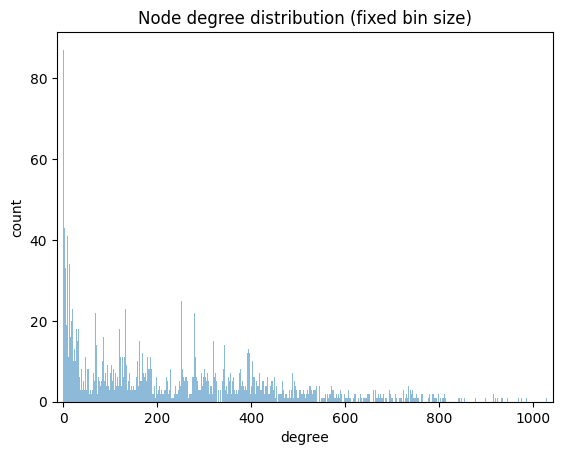

In [21]:
#Sometimes, the average degree does not reveal enough about the structure of a graph. Examining the distribution of degrees through the nodes of a graph is a much more useful measure. For instance, it would be helpful to know if almost all the nodes have degrees near the average degree, or if there are a few nodes with significantly higher degrees in the graph. 

# Set fixed bin size
bins = np.arange(0, 1050, 2) # fixed bin size

# Plot histogram
plt.xlim([min(sorted_degree_values)-15, max(sorted_degree_values)+15])
plt.hist(sorted_degree_values, bins=bins, alpha=0.5)
plt.title('Node degree distribution (fixed bin size)')
plt.xlabel('degree')
plt.ylabel('count')
plt.show()

**9) Network visualisation**

In [22]:
# The sequence to creating a Pyvis visualization from a DataFrame is as such:

# Define function to generate Pyvis visualization
def generate_network_viz(df, source_col, target_col, edge_attr='color',#weights, 
                         layout='repulsion',#'barnes_hut',
                         central_gravity=0.15, #The gravity attractor to pull the entire network to the center.
                         node_distance=420, #This is the range of influence for the repulsion.
                         spring_length=100, #length of the edges
                         spring_strength=0.15, # strong the edges springs are
                         damping=0.96 #A value ranging from 0 to 1 of how much of the velocity from theprevious physics simulation iteration carries over to the next iteration.
                         ):
    
    # Generate a networkx graph
    G = nx.from_pandas_edgelist(df, source_col, target_col, edge_attr='color') #weights, 'interaction_type'
        
    bgcolor, font_color = '#222222', 'white'
    
    # Initiate PyVis network object
    drug_net = Network(
                       height='700px', 
                       width='100%',
                       bgcolor=bgcolor, 
                       font_color=font_color, 
                       notebook=True
                      )
    
    # Take Networkx graph and translate it to a PyVis graph format
    drug_net.from_nx(G)
    
    # Create different network layout (repulsion or Barnes Hut)
    drug_net.repulsion(
                            node_distance=node_distance, 
                            central_gravity=central_gravity, 
                            spring_length=spring_length, 
                            spring_strength=spring_strength, 
                            damping=damping
                          )     
    return drug_net

* It would take very long to load entire network for all drug interactions. Therefore we will work on a subset of data. 

In [23]:
# Sample drugs for diabetes (Metformin), hyperlipidemia (Simvastatin), and hypertension (Lisinopril)
subset_meds = ['Metformin', 'Simvastatin', 'Lisinopril']

In [24]:
# Focus on subset meds
df_db_int_sm = DDI_data.loc[DDI_data['drug1_name'].isin(subset_meds) | DDI_data['drug2_name'].isin(subset_meds)]
df_db_int_sm = df_db_int_sm.reset_index(drop=True)
df_db_int_sm.head()

,drug1_name,drug2_name,weight,color,interaction_type
0,Bivalirudin,Simvastatin,1,blue,serum concentration
1,Goserelin,Metformin,1,blue,therapeutic efficacy
2,Daptomycin,Simvastatin,1,red,risk or severity of adverse effects
3,Cyclosporine,Simvastatin,1,blue,serum concentration
4,Cyclosporine,Lisinopril,1,blue,serum concentration


* Network visualization with Repulsion

In [25]:
# Generate a networkx graph based on subset data
db_subset_net = generate_network_viz(df_db_int_sm, 'drug1_name', 'drug2_name', edge_attr='color', layout='repulsion') 

# Display interactive graph
db_subset_net.show('drug_interactions_network_subset_repulsion.html')

### Summary of the first use case: 

* Network has a total of 1868 drug entities (nodes) with 222,271 interactions (edges). 
* Network density is 0.13 meaning that some nodes are interconnected.
* The average degree is 238, meaning that each drug typically interacts with 238 other drugs on average. 
* The output above reveals that the drug most frequently involved in drug interactions is Amiodarone, with a node degree of 1028. 
* The data clusters in the visualisation shown above correspond to groups of drugs that interact with one, two or all of the 3 selected drugs (metformin, simvastatin or lisinopril)
* From 3 drugs selected for network visualisation, lisinopril has the most edges that have a word "severity" as part of interaction name (shown in red). 


## <font color='green'>Part 2: BIKG Subgraphs</font>

### <font color='red'> Second use case: Trop-2 </font>

### 1) Import

In [26]:
## install packages and modules
#import sys, os

#sys.path.insert(0, os.path.join(os.environ["MODULESHOME"], "init"))
#from env_modules_python import module

#module(
#    "load", "graphviz/0.14-GCCcore-8.2.0-Python-3.7.2-Java-11.0.2"
#)  # load the graphviz module

#!{sys.executable} -m pip install pandas --user
#!{sys.executable} -m pip install networkx --user
#!{sys.executable} -m pip install matplotlib --user
#!{sys.executable} -m pip install seaborn --user
#!{sys.executable} -m pip install holoviews xarray datashader --user
#!{sys.executable} -m pip install scikit-image --user
#!{sys.executable} -m pip install bikg --user --index-url https://artifactory.astrazeneca.net/api/pypi/pypi-virtual/simple
#!{sys.executable} -m pip install numpy==1.20.0 --user
##!{sys.executable} -m pip install pandas_profiling --user

#!{sys.executable} -m pip install bikg --upgrade --index-url https://artifactory.astrazeneca.net/api/pypi/pypi-virtual/simple

In [27]:
AUTH_TYPE = "email_password"
GRAPH_TYPE = "full"
RENDER_ENGINE = "pyvis"

In [28]:
import bikg
import pandas as pd
from pyvis import network as net

####################
❤️ Please don't forget to credit BIKG if you use it in your work. For example, internal postcards, presentations and any publications.
####################


### 2) Authenticate 
* To download BIKG data

In [29]:
credentials = bikg.download.authenticate(auth_type="email_password")

Enter your prid (e.g kabc123): kvmm591
Enter your password: ··············


2023-06-07 14:51:22,361 - INFO - download - Authenticating as kvmm591@astrazeneca.net
2023-06-07 14:51:22,362 - INFO - download - Checking your credentials work...
2023-06-07 14:51:23,329 - INFO - download - Valid


### 3) Setup graph configuration
* Preview the full BIKG schema - to understand what data is available 

In [51]:
#pip install -U pyvis==0.1.9

remote_graph = bikg.download.RemoteGraph(credentials, graph_version="latest")
full_schema = remote_graph.get_remote_schema()

full_schema.print_schema(engine="pyvis", width=800, height=500)

2023-06-07 14:53:02,525 - INFO - download - Checking for the latest graph version...
2023-06-07 14:53:02,847 - INFO - download - latest graph version: 2023-05-10-4.32.0


* The full schema is very busy.
* Filters can be used to preview smaller parts of the schema. 

In [31]:
full_schema.print_schema(
        engine="pyvis",
        source_filters=["Gene Target"],
        relation_filters=["co_occurs","interacts"]
        )

* List available edges and node types

In [32]:
print("Node types:", full_schema.node_types, "\n")
print("Edge types:", full_schema.edge_types, "\n")

Node types: ['Pathway', 'Variant', 'Protein Variant', 'Cellular Component', 'Cell Type', 'Biological Process', 'Patient', 'Drug Combination', 'Protein Complex', 'Treatment', 'Symptom', 'Disease', 'Pharmacologic Class', 'Molecular Function', 'Mechanism of Action', 'Cell Line', 'Compound', 'Biomarker', 'Assay', 'Side Effect', 'Phenotype', 'Sample', 'Anatomy', 'Gene Target'] 

Edge types: ['co_occurs', 'develops_into', 'has_inferred_link', 'has_link', 'has_negative_inferred_link', 'has_negative_link', 'part_of', 'rdfs:subClassOf', 'has_assay_cell_line', 'has_assay_target', 'non_responsive_to', 'response_additive', 'response_antagonistic', 'response_has_benefit', 'response_no_benefit', 'response_synergistic', 'responsive_to', 'go:happens_during', 'go:negatively_regulates', 'go:occurs_in', 'go:positively_regulates', 'go:regulates', 'involved_in', 'for_treatment', 'includes', 'related_to_disease', 'has_screen_effect', 'resistance_hit_in_screen', 'sensitive_hit_in_screen', 'treated_with_compo

* List the possible triple combinations

In [33]:
pd.DataFrame(full_schema.triple_types)

,source_type,relation,target_type,provenances,count
0,Anatomy,co_occurs,Anatomy,[BIKG_SCIENTIFIC_LITERATURE],112126
1,Anatomy,co_occurs,Biological Process,[BIKG_SCIENTIFIC_LITERATURE],4617
2,Anatomy,co_occurs,Cell Type,[BIKG_SCIENTIFIC_LITERATURE],6615
3,Anatomy,co_occurs,Cellular Component,[BIKG_SCIENTIFIC_LITERATURE],2596
4,Anatomy,co_occurs,Compound,[BIKG_SCIENTIFIC_LITERATURE],51543
...,...,...,...,...,...
562,Variant,associates,Anatomy,[OPENTARGETS_GENETICS_D2V2G],1
563,Variant,associates,Biological Process,[OPENTARGETS_GENETICS_D2V2G],809
564,Variant,associates,Compound,[OPENTARGETS_GENETICS_D2V2G],239
565,Variant,associates,Disease,"[OMIM_DATA, OPENTARGETS_GENETICS_D2V2G]",232431


### 4) Create your graph configuration and load your graph

* Do it when you want to use a subgraph of BIKG
* Below is Gene-Disease-Compound_Pharmacologic Class subgraph.
* Interactive tool to build a subgraph: https://config.bikg.astrazeneca.net/

In [34]:
#GraphConfig - defines the subgraph to be used; enables you to create complex combinations and leverage include and exclude conditions
#GraphConfigHelper - to help create your own graph configuration
#Edge filters - to load edges that match certain column values 
#The edge_filters settings apply edge filters

gc_helper = bikg.GraphConfigHelper(credentials, graph_version="latest")
graph_config = bikg.GraphConfig(
    graph_version=gc_helper.graph_version,
    include_filters=gc_helper.generate_triple_filters([
        ["Gene Target", (
            {
                "associates": {
                    "prov": [
                        "CTD",
                        "HETIONET",
                        "HPOA",
                        "LOUNKINE_2012",
                        "OPENTARGETS",
                        "ORPHANET",
                        "PHARMAPROJECTS",
                        "TCRD"
                    ]
                }
            }
        
        ), "Disease"], 
        ["Compound", (
            {
                "affects": {
                    "prov": [
                        "AZ_COMPOUND_SIGNATURES",
                        "AZ_ONCOLOGY_DRUG_TABLE",
                        "BIOGRID",
                        "DGI_DB",
                        "HETIONET",
                        "LOUNKINE_2012",
                        "METABASE"
                    ]
                }
            }
        , "has_intended_target"), "Gene Target"], 
        ["Compound", ("resembles"), "Compound"], 
        ["Compound", ("influences", 
            {
                "treats": {
                    "prov": [
                        "PHARMAPROJECTS"
                    ]
                }
            }
        
        ), "Disease"], 
        ["Pharmacologic Class", "*", "Compound"], 
        ["Disease", ("rdfs:subClassOf", "resembles", "presents"), "Disease"], 

    ]),
)

dataset_path = "/projects/it/bikg/downloads/%s" % gc_helper.graph_version

#Create the graph and load it into memory
subgraph = bikg.Graph.load_bikg(
    local_path=dataset_path,
    credentials=credentials,
    graph_config=graph_config,
    download=False #By selected download=True it will download the data to disk then load it into memory. If you set download=False it will only use pre-downloaded data.
)


2023-06-07 14:51:24,196 - INFO - download - Checking for the latest graph version...
2023-06-07 14:51:24,399 - INFO - download - latest graph version: 2023-05-10-4.32.0
2023-06-07 14:51:28,649 - INFO - graph - Loading graph...
2023-06-07 14:52:08,313 - INFO - graph - Done!


In [35]:
print("BIKG subgraph stats:")
print("\tNum edges:", len (subgraph.edges) )
print("\tNum nodes:", len (subgraph.nodes) )

BIKG subgraph stats:
	Num edges: 2017567
	Num nodes: 567445


### 5) Visualise your graph schema

In [36]:
graph_config.visualize(width=600, height=500)

* The edges and nodes data are stored in pandas dataframes

In [37]:
subgraph.edges[["source_label","relation","target_label"]].sample(5)

,source_label,relation,target_label
edge_id,,,
26_PzauqnQm7W7hMwIJGyx,CHEMBL409764,resembles,CHEMBL276038
8O8yITFvyV95UQamM7ElBJ,GGTLC2,associates,metaphyseal acroscyphodysplasia
6T2mDR5g0Vu6OZl9XX4vfV,CHEMCONNECT:259114647,resembles,CHEMBL2403620
5R4H65X1XOe75jN6cWpatc,RSPH14,associates,Kidney Neoplasms
8OkajTMUyoY6IXI67693NA,CHEMCONNECT:206118570,resembles,CHEMBL3197762


In [38]:
subgraph.nodes.sample(5)

,default_label,type
default_id,,
CHEMBL:CHEMBL454240,GLABRACIN A,Compound
CHEMCONNECT:208910922,CHEMCONNECT:208910922,Compound
CHEMBL:CHEMBL3349365,CHEMBL3349365,Compound
CHEMBL:CHEMBL196635,CHEMBL196635,Compound
ENSEMBL:ENSG00000136869,TLR4,Gene Target


### 6) TROP2 subgraph 

* Subgraphs are pandas objects
* Some convenient variables:

In [39]:
edges = subgraph.edges
nodes = subgraph.nodes

In [40]:
node2label = nodes.default_label.to_dict()
node2type = nodes.type.to_dict()

In [41]:
gene_label = "TACSTD2" #Trop2

* Find compounds and diseases connecting to TROP-2

In [42]:
nodes[nodes.default_label == gene_label] #to get a node by a mapped ID/label

,default_label,type
default_id,,
ENSEMBL:ENSG00000184292,TACSTD2,Gene Target


In [43]:
trop2_gene_id = "ENSEMBL:ENSG00000184292"

* Get 1-hop Compound and Disease neighbours of TROP-2

In [44]:
trop2_edges = edges[
    (edges.source_id == trop2_gene_id) |
    (edges.target_id == trop2_gene_id) 
].copy()
trop2_edges.head(2)

,source_id,source_label,source_type,relation,target_id,target_label,target_type,prov
edge_id,,,,,,,,
AhyaIzLkhZ7y098Cb7DET,CHEMCONNECT:325463774,CDK2_5968,Compound,affects,ENSEMBL:ENSG00000184292,TACSTD2,Gene Target,AZ_ONCOLOGY_DRUG_TABLE
6ZOhd1kQEMu4q2_Af4ABiK,CHEMBL:CHEMBL3301610,ABEMACICLIB,Compound,affects,ENSEMBL:ENSG00000184292,TACSTD2,Gene Target,AZ_ONCOLOGY_DRUG_TABLE


In [45]:
#COmpounds that connect to Trop-2
trop2_compounds = set(trop2_edges[trop2_edges.source_type == "Compound"].source_id.tolist())

#Diseases that connect to Trop-2
trop2_diseases = set(trop2_edges[trop2_edges.target_type == "Disease"].target_id.tolist())
trop2_diseases

{'DOID:0050155',
 'DOID:0050687',
 'EFO:0000182',
 'EFO:0000335',
 'EFO:0000365',
 'EFO:0000384',
 'EFO:0001361',
 'EFO:0002517',
 'EFO:0004252',
 'EFO:0004266',
 'EFO:0004268',
 'EFO:0005842',
 'EFO:1001999',
 'MONDO:0003825',
 'MONDO:0003834',
 'MONDO:0004953',
 'MONDO:0004992',
 'MONDO:0004993',
 'MONDO:0005005',
 'MONDO:0005023',
 'MONDO:0005075',
 'MONDO:0005101',
 'MONDO:0005133',
 'MONDO:0005138',
 'MONDO:0005140',
 'MONDO:0005192',
 'MONDO:0005221',
 'MONDO:0005265',
 'MONDO:0005282',
 'MONDO:0005328',
 'MONDO:0005401',
 'MONDO:0006156',
 'MONDO:0006498',
 'MONDO:0006863',
 'MONDO:0007034',
 'MONDO:0008449',
 'MONDO:0008777',
 'MONDO:0009061',
 'MONDO:0009239',
 'MONDO:0009807',
 'MONDO:0010671',
 'MONDO:0010765',
 'MONDO:0011849',
 'MONDO:0016281',
 'MONDO:0016553',
 'MONDO:0017967',
 'MONDO:0018301',
 'MONDO:0018393',
 'ORPHANET:363741',
 'ORPHANET:983'}

* How does the compound connect?

In [46]:
trop2_cmp_cmp = edges[
    edges.source_id.isin(trop2_compounds) &
    edges.target_id.isin(trop2_compounds) 
]
trop2_cmp_cmp

,source_id,source_label,source_type,relation,target_id,target_label,target_type,prov
edge_id,,,,,,,,


They don't!

* How does the diseases connect?

In [47]:
trop2_dis_dis = edges[
    edges.source_id.isin(trop2_diseases) &
    edges.target_id.isin(trop2_diseases) 
]
trop2_dis_dis

,source_id,source_label,source_type,relation,target_id,target_label,target_type,prov
edge_id,,,,,,,,
8czVlJ23OGI4bB9pFjmVIO,MONDO:0004993,carcinoma,Disease,rdfs:subClassOf,MONDO:0004992,cancer,Disease,MONDO
1fypz5HOIaleC1WzcS_wZ,MONDO:0005138,lung carcinoma,Disease,rdfs:subClassOf,MONDO:0004993,carcinoma,Disease,MONDO
5ElkPwuZOo_6cjdg73az8l,MONDO:0005401,colonic neoplasm,Disease,resembles,MONDO:0005101,ulcerative colitis,Disease,HETIONET


* How does compounds and diseases connect?

In [48]:
trop2_cmp_dis = edges[
    (edges.source_id.isin(trop2_compounds) &
    edges.target_id.isin(trop2_diseases) ) |
    (edges.source_id.isin(trop2_diseases) &
    edges.target_id.isin(trop2_compounds) )
    
]
trop2_cmp_dis

,source_id,source_label,source_type,relation,target_id,target_label,target_type,prov
edge_id,,,,,,,,


* Collect the subgraphs:

In [49]:
vis_edges = pd.concat([
    trop2_edges, 
    trop2_cmp_cmp, 
    trop2_dis_dis,
    trop2_cmp_dis
])[["source_id", "target_id"]].to_records(index=False)
vis_nodes = set(vis_edges.source_id.tolist() + vis_edges.target_id.tolist())

* Visualize (compound in blue, diesease in red, gene target in yellow)

In [50]:
colors = {
    "Compound": "#00cec9", #blue
    "Disease": "#e17055", #red
    "Gene Target": "#fdcb6e" #yellow
}

g = net.Network(notebook=True, directed=True, width=1000, height=800) #
for node_id in vis_nodes:
    node_label = node2label[node_id]
    if node_label:
        node_type = node2type[node_id]
        color = colors[node_type]
        g.add_node(node_label, color=color, title=node_id)

for edge in vis_edges:
    
    src_label = node2label[edge[0]]
    tgt_label = node2label[edge[1]]
    g.add_edge(src_label, tgt_label)

    
g.set_options(
"""
var options = {
  "physics": {
    "barnesHut": {
      "gravitationalConstant": -11000
    },
    "minVelocity": 0.75
  }
}
"""
)  

g.show("trop2.html")

### Summary of the second use case: 

* The full schema is very busy. Therefore it is best to preview smaller parts of the schema.
* We limited our data to focus on a use case arund Trop2 gene target. 
* For this limited dataset we observed that Trop2 has many edges with both compounds and diseases. There are no compound-compound edges and compound-diease edges. There are however disease-disease edges. 
* Next we could add more data modalities to this graph to explore what internal/external chemistry/biology do we have about Trop2. 
    